# Classification model using Decision Tree

### 1. Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload RNA data

In [7]:
path ='../../../Data_preprocessing//RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.979436,0.927694,0.847157,0.927951,0.954266,0.702499,0.924324,0.947513,0.977068,0.974450
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.942790,0.904091,0.916965,0.984643,0.951518,0.702499,0.985716,0.926652,0.977485,0.952089
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.899643,0.895334,0.962866,0.971061,0.941744,0.891154,0.966061,0.927933,0.938855,0.929364
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.930375,0.920000,0.906820,0.965345,0.989037,0.890711,0.953759,0.925267,0.984474,0.978449
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.909491,0.933381,0.970506,0.962001,0.965852,0.690264,0.961500,0.933123,0.962010,0.945552


In [8]:
X = data.iloc[:,28:43894] 
Y = []
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
X

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B
0,0.716961,0.901091,0.899331,0.731610,0.876518,0.983111,0.761715,0.675687,1.000000,0.844881,...,0.906018,0.901859,0.956784,1.000000,0.863461,0.681978,0.920806,0.694696,0.726174,0.618840
1,0.716961,0.920955,0.639678,0.731610,0.865551,0.977815,0.761715,0.675687,1.000000,0.844881,...,0.888982,0.871671,0.935335,0.955474,0.951059,0.681978,0.942864,0.694696,0.969806,0.618840
2,0.716961,0.929084,0.893207,0.731610,0.903742,0.941019,0.928798,0.675687,1.000000,0.844881,...,0.872201,0.915482,0.897834,0.932112,0.921165,0.836775,0.900459,0.694696,0.811564,0.618840
3,0.716540,0.917331,0.897599,0.808758,0.747520,0.954937,0.598825,0.770790,0.995264,0.829723,...,0.938526,0.907164,0.938470,0.993855,0.955499,1.000000,0.957533,0.792372,0.881986,0.759375
4,0.714991,0.956733,0.881020,0.758973,0.915812,0.961075,0.919822,0.734050,0.995452,0.833815,...,0.914902,0.916405,0.928037,0.958617,0.956696,0.810564,0.934734,0.723179,0.904923,0.601262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.716941,0.894894,0.837912,0.841613,0.949286,0.965205,0.891619,0.722027,0.999980,0.836349,...,0.944044,0.890234,0.919025,0.962862,0.950005,0.904248,0.897653,0.688298,0.942960,0.652955
140,0.716961,0.940873,0.765798,0.731610,0.645358,0.997207,0.761715,0.675687,1.000000,0.844881,...,0.712173,0.892719,0.930997,0.936610,0.931036,0.860999,0.975198,0.694696,0.876408,0.618840
141,0.714991,0.930476,0.923901,0.914943,0.713713,0.980062,0.959801,0.807083,0.995452,0.833815,...,0.632590,0.801168,0.944798,0.907089,0.938829,0.719603,0.934211,0.667529,0.807461,0.601262
142,0.714991,0.916554,0.926047,0.787616,0.868364,0.972652,0.807885,0.616311,0.995452,0.833815,...,0.918342,0.937790,0.916233,0.952558,0.970142,0.721751,0.957712,0.667529,0.940769,0.601262


### 3. Train-Test dataset split

In [9]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Select the parameters of the model and fit it

In [10]:
param_grid = {'min_samples_leaf': [2,5,7],
              'min_samples_split': [2, 5],
              'max_depth':[2,5,10,12],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}


# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5], 'random_state': [125],
                         'splitter': ['best', 'random']})

In [11]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(max_depth=2, min_samples_leaf=7, random_state=125)

In [12]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.582608695652174


### 5. Prediction

In [13]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [14]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [15]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.8434782608695652
Final accuracy on the testing dataset: 0.4827586206896552


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[61  5]
 [13 36]]
Input data:  [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 0]


In [17]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        66
           1       0.88      0.73      0.80        49

    accuracy                           0.84       115
   macro avg       0.85      0.83      0.84       115
weighted avg       0.85      0.84      0.84       115



In [18]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[12  7]
 [ 8  2]]
Input data:  [1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
Prediction:        [0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1]


In [19]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.22      0.20      0.21        10

    accuracy                           0.48        29
   macro avg       0.41      0.42      0.41        29
weighted avg       0.47      0.48      0.48        29



### 7. Results visualizaton

In [20]:
X = data.iloc[1:1:43894]
print(X)
cols = []
for i in X:
    if i!= 'Target':
        cols.append(i)
print(len(cols))

Empty DataFrame
Columns: [Unnamed: 0, RNA_ID, Age, Sarc, Rhab, Number_of_Prior_Therapies, Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy, Tumor_Shrinkage, PFS, TM_TC_Ratio, Cohort_CM-009, Cohort_CM-010, Cohort_CM-025, Sex_Female, Sex_Male, MSKCC_FAVORABLE, MSKCC_INTERMEDIATE, MSKCC_NA, MSKCC_POOR, IMDC_FAVORABLE, IMDC_INTERMEDIATE, IMDC_NOT_REPORTED, IMDC_POOR, ImmunoPhenotype_Desert, ImmunoPhenotype_Excluded, ImmunoPhenotype_Infiltrated, ImmunoPhenotype_NA, Unnamed: 0_y, 5S_rRNA, 7SK, A1BG, A1BG-AS1, A1CF, A2M, A2M-AS1, A2ML1, A2ML1-AS1, A2MP1, A3GALT2, A4GALT, A4GNT, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL2-AS1, AADACL3, AADACL4, AADACP1, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATBC, AATK, AATK-AS1, AB015752.3, AB019438.66, AB019441.29, ABAT, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCA9-AS1, ABCB1, ABCB10, ABCB10P3, ABCB10P4, ABCB11, ABCB4,

In [21]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = cols
               )
print(texto_modelo)

ValueError: feature_names must contain 43866 elements, got 43921

Profundidad del árbol: 5
Número de nodos terminales: 15


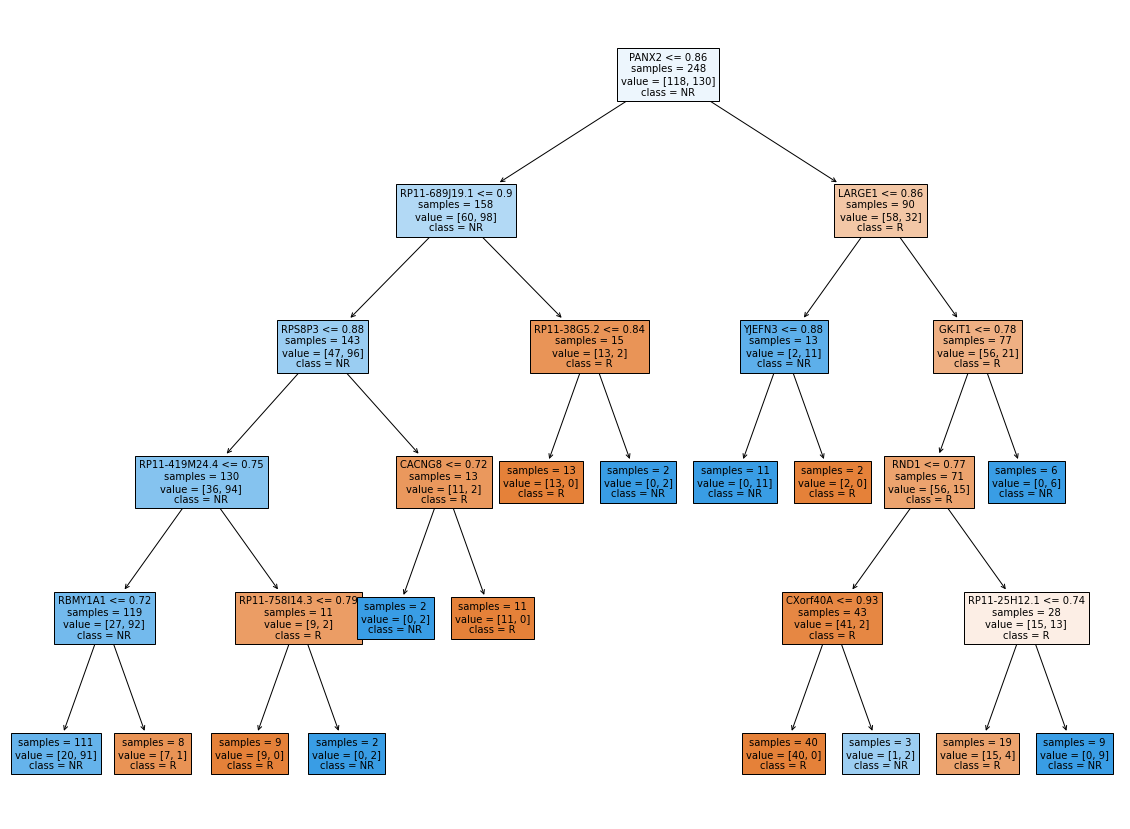

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = cols,
            class_names   = ['R','NR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )